In [1]:
from datasets.get_datasets import *
from revision import *
from boostsrl import boostsrl
import random

## Parameters

In [10]:
target = 'workedunder'
test_size = 0.3
small_train_size = 0.05
validation_size = 0.2
revision_threshold = 0.8
max_revision_iterations = 10

## Dataset

In [11]:
[facts, pos, neg] = get_imdb_dataset(target)

## Background  configuration

In [12]:
bk = ['workedunder(+person,+person).',
      'workedunder(+person,-person).',
      'workedunder(-person,+person).',
      'female(+person).',
      'actor(+person).',
      'director(+person).',
      'movie(+movie,+person).',
      'movie(+movie,-person).',
      'movie(-movie,+person).',
      'genre(+person,+genre).']

background = boostsrl.modes(bk, [target], useStdLogicVariables=False, treeDepth=8, nodeSize=3, numOfClauses=8)

## Sampling examples

In [17]:
# shuffle all examples
random.shuffle(pos)
random.shuffle(neg)

# separate train and test
test_pos = pos[:int(test_size*len(pos))]
test_neg = neg[:int(test_size*len(neg))]
train_pos = pos[int(test_size*len(pos)):]
train_neg = neg[int(test_size*len(neg)):]

# learn from scratch in a small dataset
s_train_pos = train_pos[:int(small_train_size*len(train_pos))]
s_train_neg = train_neg[:int(small_train_size*len(train_neg))]

# shuffle all train examples
random.shuffle(train_pos)
random.shuffle(train_neg)

# train set used in revision and validation set
r_train_pos = train_pos[int(validation_size*len(train_pos)):]
r_train_neg = train_neg[int(validation_size*len(train_neg)):]
validation_pos = train_pos[:int(validation_size*len(train_pos))]
validation_neg = train_neg[:int(validation_size*len(train_neg))]

print('Total examples')
print('Positive examples: %s' % len(pos))
print('Negative examples: %s' % len(neg))
print('\n')
print('Train and test sets from total')
print('Train Positive examples: %s' % len(train_pos))
print('Train Negative examples: %s' % len(train_neg))
print('Test Positive examples: %s' % len(test_pos))
print('Test Negative examples: %s' % len(test_neg))
print('\n')
print('Small dataset')
print('Train Positive examples: %s' % len(s_train_pos))
print('Train Negative examples: %s' % len(s_train_neg))
print('\n')
print('Revision theory train dataset and validation')
print('Train Positive examples: %s' % len(r_train_pos))
print('Train Negative examples: %s' % len(r_train_neg))
print('Validation Positive examples: %s' % len(validation_pos))
print('Validation Negative examples: %s' % len(validation_neg))

Total examples
Positive examples: 382
Negative examples: 14236


Train and test sets from total
Train Positive examples: 268
Train Negative examples: 9966
Test Positive examples: 114
Test Negative examples: 4270


Small dataset
Train Positive examples: 13
Train Negative examples: 498


Revision theory train dataset and validation
Train Positive examples: 215
Train Negative examples: 7973
Validation Positive examples: 53
Validation Negative examples: 1993


## Learning from small dataset

WILL-Produced Tree:
% FOR workedunder(A, B):
%   if ( director(B), movie(C, A), movie(C, B) )
%   then return 0.8581489350995123;  // std dev = 0,000, 13,000 (wgt'ed) examples reached here.  /* #pos=13 */
%   else return -0.1418510649004877;  // std dev = 2,36e-08, 31,000 (wgt'ed) examples reached here.  /* #neg=31 */


Results:
{'CLL': -0.165344, 'AUC ROC': 0.995433, 'F1': nan, 'Precision': [nan, 0.5], 'AUC PR': 0.745098, 'Recall': 0.0}


Total learning time: 0.544 seconds
Total inference time: 0.802 seconds
AUC ROC: 0.995433


Tree:


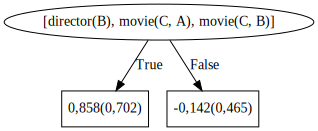

In [18]:
delete_model_files()
model = boostsrl.train(background, s_train_pos, s_train_neg, facts)
learning_time = model.traintime()
will = model.get_will_produced_tree()
structured = model.get_structured_tree().copy()
results = boostsrl.test(model, test_pos, test_neg, facts)
inference_time = results.testtime()
t_results = results.summarize_results()
print('WILL-Produced Tree:')
print_will_produced_tree(will)
print('\n')
print('Results:')
print(t_results)
print('\n')
print('Total learning time: %s seconds' % learning_time)
print('Total inference time: %s seconds' % inference_time)
print('AUC ROC: %s' % t_results['AUC ROC'])
print('\n')
print('Tree:')
model.tree(0, target, image=True)

## Learning from complete dataset

WILL-Produced Tree:
% FOR workedunder(A, B):
%   if ( director(B), movie(C, A), movie(C, B) )
%   then if ( female(A) )
%   | then return 0.8581489350995108;  // std dev = 5,96e-07, 114,000 (wgt'ed) examples reached here.  /* #pos=114 */
%   | else return 0.851697322196284;  // std dev = 0,080, 155,000 (wgt'ed) examples reached here.  /* #neg=1 #pos=154 */
%   else return -0.1418510649004874;  // std dev = 2,31e-07, 511,000 (wgt'ed) examples reached here.  /* #neg=511 */


Results:
{'CLL': -0.165389, 'AUC ROC': 0.997677, 'F1': nan, 'Precision': [nan, 0.5], 'AUC PR': 0.914146, 'Recall': 0.0}


Total learning time: 2.263 seconds
Total inference time: 1.049 seconds
AUC ROC: 0.997677


Tree:


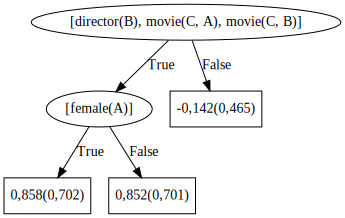

In [19]:
delete_model_files()
model = boostsrl.train(background, train_pos, train_neg, facts)
learning_time = model.traintime()
will = model.get_will_produced_tree()
#structured = model.get_structured_tree().copy()
results = boostsrl.test(model, test_pos, test_neg, facts)
inference_time = results.testtime()
t_results = results.summarize_results()
print('WILL-Produced Tree:')
print_will_produced_tree(will)
print('\n')
print('Results:')
print(t_results)
print('\n')
print('Total learning time: %s seconds' % learning_time)
print('Total inference time: %s seconds' % inference_time)
print('AUC ROC: %s' % t_results['AUC ROC'])
print('\n')
print('Tree:')
model.tree(0, target, image=True)

## Theory Revision

Performing parameter learning
******************************************
WILL-Produced Tree:
% FOR workedunder(A, B):
%   if ( director(B), movie(C, A), movie(C, B) )
%   then return 0.8354216623722363;  // std dev = 2,211, 220,000 (wgt'ed) examples reached here.  /* #neg=5 #pos=215 */
%   else return -0.1418510649004874;  // std dev = 2,95e-07, 436,000 (wgt'ed) examples reached here.  /* #neg=436 */


Results:
{'CLL': -0.165488, 'AUC ROC': 0.995735, 'F1': nan, 'Precision': [nan, 0.5], 'AUC PR': 0.757143, 'Recall': 0.0}


Total learning time: 0.565 seconds
Total inference time: 0.621 seconds
AUC ROC: 0.995735


Refining iteration 1
******************************************
Best Tree AUC ROC so far: 0.995735
******************************************

******************************************
Total revision time: 1.186
Best validation AUC ROC: 0.995735
WILL-Produced Tree:
% FOR workedunder(A, B):
%   if ( director(B), movie(C, A), movie(C, B) )
%   then return 0.8354216623722363;  // 

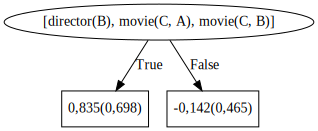

In [20]:
total_revision_time = 0
best_aucroc = 0
best_structured = None

print('Performing parameter learning')
print('******************************************')
delete_model_files()
model = boostsrl.train(background, r_train_pos, r_train_neg, facts, refine=get_refine_file(structured))
learning_time = model.traintime()
will = model.get_will_produced_tree()
structured = model.get_structured_tree().copy()
results = boostsrl.test(model, validation_pos, validation_neg, facts)
inference_time = results.testtime()
t_results = results.summarize_results()
total_revision_time += learning_time + inference_time
print('WILL-Produced Tree:')
print_will_produced_tree(will)
print('\n')
print('Results:')
print(t_results)
print('\n')
print('Total learning time: %s seconds' % learning_time)
print('Total inference time: %s seconds' % inference_time)
print('AUC ROC: %s' % t_results['AUC ROC'])
print('\n')
#print('Tree:')
#model.tree(0, target, image=True)

best_aucroc = t_results['AUC ROC']
best_structured = structured.copy()
save_model_files()

for i in range(max_revision_iterations):
    print('Refining iteration %s' % str(i+1))
    print('******************************************')
    found_better = False
    for candidate in get_cantidates(best_structured, revision_threshold):
        print('Refining node candidate')
        print('******************************************')
        delete_model_files()
        model = boostsrl.train(background, r_train_pos, r_train_neg, facts, refine=candidate)
        learning_time = model.traintime()
        will = model.get_will_produced_tree()
        results = boostsrl.test(model, validation_pos, validation_neg, facts)
        inference_time = results.testtime()
        t_results = results.summarize_results()
        total_revision_time += learning_time + inference_time
        print('WILL-Produced Tree:')
        print_will_produced_tree(will)
        print('\n')
        print('Results:')
        print(t_results)
        print('\n')
        print('Total learning time: %s seconds' % learning_time)
        print('Total inference time: %s seconds' % inference_time)
        print('AUC ROC: %s' % t_results['AUC ROC'])
        print('\n')
        #print('Tree:')
        #model.tree(0, target, image=True)
        print('******************************************')

        if t_results['AUC ROC'] > best_aucroc:
            found_better = True
            best_aucroc = t_results['AUC ROC']
            best_structured = model.get_structured_tree().copy()
            save_model_files()
    print('Best Tree AUC ROC so far: %s' % best_aucroc)
    print('******************************************\n')
    if found_better == False:
        break

print('******************************************')
delete_model_files()
get_saved_model_files()
delete_test_files()
print('Total revision time: %s' % total_revision_time)
print('Best validation AUC ROC: %s' % best_aucroc)
will = model.get_will_produced_tree()
results = boostsrl.test(model, test_pos, test_neg, facts)
inference_time = results.testtime()
t_results = results.summarize_results()
print('WILL-Produced Tree:')
print_will_produced_tree(will)
print('\n')
print('Results:')
print(t_results)
print('\n')
print('Total inference time: %s seconds' % inference_time)
print('AUC ROC: %s' % t_results['AUC ROC'])
print('\n')
print('Tree:')
model.tree(0, target, image=True)